[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MjzUke5SDxffqmpruiUzfdBLR6gKbCBM)

# [Analiza problemu reidentyfikacji obiektów z wykorzystaniem głębokich sieci neutronowych.](Praca_Dyplomowa_Tomasz_Tarabasz.ipynb)

## [1. Streszczenie](notebook/01_Streszczenie.*ipnb*)

Praca zawiera opis oraz definicję problemu reidentyfikacji obrazów. W dokumencie przedstawiono wykorzystanie dwóch powszechnie wykorzystywanych systemów do testowania własnych rozwiązań problemu reidentyfikacji jak i modyfikacji obecnie wiodących architektur. W pracy przedstawiono przykład zastosowania systemu z w połączeniu z systemem detekcji osób. cd ...

## [2. Wstęp]()

### 1. Motywacja 

Problem rozpoznawania osób i obiektów na różnych ujeciach z wielu kamer stał się w ostatnim czasie jednym z najczęściej badanych zagadnień. Potwierdza to cytac z pracy [[4] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch](https://arxiv.org/pdf/1910.10093.pdf) "Driven by the growing demands for intelligent surveillance and forensic applications, person re-identification (re-ID) has become a topical
research area in computer vision." w wolnym tłumaczeniu "Rozwiązanie umożliwiające identyfikację osób z różnych kamer oraz ujęć stało się jednym z najczęściej badanych zagadnień. Stało się tak za sprawą rosnącego zainteresowania służ wykorzstaniem aplikacyjnym takiego rozwiązania". Na potwierdzenie tego wniosku przedstawiono wykres obrazujący ilość 
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/IloscPrac.jpg?raw=true" alt="drawing" width="400"/>
<br><br>

Potencjał rozwiązania tego zagadnienia wykracza jednak poza użycie jakim są zainteresowane służby bezpieczeństwa. Jest zdecydowanie bardziej ogólnym problemem dającym możliwość przypisywania identyfikatora dla obiektów tej samej klasy. Uogólnia zatem temat detekcji oraz rozszerza dziedzinę jej rozwiązań o klasy pośrednie w stusunku do wykorzystanych w procesie uczenia. 
<br><br>

Warto również zaznaczyć, że zgodnie z - [[6] reid-strong-baseline - pdf](https://arxiv.org/pdf/1903.07071.pdf) znaczący postęp w tej tematycie dokonał się właśnie dzięki GSN (głębokim siecią neuronowym). Odnosząć się do cytatu "Person re-identification (ReID) with deep neural networks has made progress and achieved high performance
in recent years. However, many state-of-the-arts methods
design complex network structure and concatenate multibranch features. In the literature, some effective training
tricks or refinements are briefly appeared in several papers
or source codes" należy zauważyć, że zgodnie z przytoczonym fragmentem rozwój w tej dziedzinie jest bardzo szybki i istnieje przestrzeń na łaczenie wielu proponowanych rozwiązń.

### 2. Cel pracy

Dalsza cześć pracy wymaga sformułowania założeń. Te natomiast wymagaja postawienia celi jakie adresować będzie ta praca. Zawierto je w dwóch punktach:

*   Modyfikacja istniejących rozwiązań z założeniem poprawy wyników.
*   Wykorzystnie rozwiązani jako cześci systemu (link do opisu systemu)

Założenia czynione w dalszej części pracy będą wynikały z powyższych punktów.
<br><br>
Pierwszy z nich odnosi sie do wykorzstania obecnie istniejących rozwiązań. Porównania wyników jakie uzyskano oraz próbie modyfikacji modeli w celu poprawy wyników dla wyspecyfikowanego typu zagadnienia. Próby będą dotyczyły zmiany architektury sieci, trybów uczenia, zmiany funkcji aktywacji oraz modyfikacji optymalizowanej funkcji strat. Wykorzystane zostaną nie tylko frameworki takiego jak <br>- [[1] reid-strong-baseline](https://github.com/michuanhaohao/reid-strong-baseline) <br> czy <br> - [[4] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch](https://arxiv.org/pdf/1910.10093.pdf)
<br>
ale również techniki takie jak finetuning.
<br><br>
Drugie założenie specyfikuje problem. Nadaje kierunek w jakim ma podążać optymalizaja wyników oraz cech sieci. W tym dostosowanie sieci do pracy w trybie "real time" co wymusza skracanie czasu obliczeń i zmiejszanie sieci przy zachowaniu tego samego poziomu dokładności. Powody wybieranych rozwiązań upatrywać należy właśnie w spełnieniu tego założenia.



### 3 Wybór systemów do reidentyfikacji

W badaniach rozważano wykorzystanie dwóch powszechnie używanych framework-ów:
- [[1] reid-strong-baseline](https://github.com/michuanhaohao/reid-strong-baseline) <br>
Framework z szeroko opisanymi usprawnieniami w procesie trenowania. Zawiera szeroką gamę zbiarów danych oraz wynik zaprezentowanych przez twórców jest obecnie najlepszym opublikowanym wynikiem problemu reidentyfikacji.
<br><br>
- [[5] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch](https://github.com/KaiyangZhou/deep-person-reid/tree/master/projects)
<br> Jest to framework napisany z użyciem PyTorch i jest kompleksowym narzędziem do tworzenia i porównywania sieci stworzonych do reidentyfikacji sieci. Zawiera wiele baz danych.


Ostatecznie zdecydowano o wykorzystaniu [[1] reif-strong-baseline](https://github.com/michuanhaohao/reid-strong-baseline). Argumentami przeważajacymi na wyborze tego systemu były:
- dokładny opis wykorzystanych usprawnień w procesie trenowania.
- duża elastyczność rozwiązania umożliwiająca znaczące modyfikacje. 

## [3. DataSets]()


Lista dostępnych datasetów obsługiwanych przez - [[5] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch](https://github.com/KaiyangZhou/deep-person-reid/tree/master/projects) jest bogata i zawiera:
<br>
<br>
a. Datasety ze zdjęciami:
- Market1501 [[7] Market1501 - pdf](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Zheng_Scalable_Person_Re-Identification_ICCV_2015_paper.pdf)
- CUHK03
- DukeMTMC-reID
- MSMT17
- VIPeR
- GRID
- CUHK01
- SenseReID
- QMUL-iLIDS
- PRID
<br><br>

b. Datasety ze nagraniami video:
- MARS
- iLIDS-VID
- PRID2011
- DukeMTMC-VideoReID
<br><br>

Dwa najczęściej wykorzystywane w tego typu zadaniach datasety to:
- Market1501 [[7] Market1501 - pdf](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Zheng_Scalable_Person_Re-Identification_ICCV_2015_paper.pdf)
- DukeMTMC-reID

### Market1501




To jeden z najczęściej wykorzsystywany zbiór danych od trenowania systemów reidentyfikacji osób. Jak twierdzą twórcy: "To nowy wysokiej jakości dataset do reidetnyfikacji osób nazwanym 'Market-1501'. Ogólenie dotychczasowe zbory:
 - są ograniczone w skalowaniu
 - posiadają ręcznie zaznaczone obramowania, które nie są dostępne w realnych ustawieniach
 - posiadają jedynie jeden obraz wzorcowy dla każdej z osób z zestawu instancji do wyszukiwania

W celu wyeliminowania tych problemów zbór Market-1501 posiada trzy cechy. Pierwsza z nich to 32 000 zidentyfikowanych obramowań, ponad to ponad 500 tysięcy obrazów, które tworzą największy zbiór osób do trenowania modeli z zakresu zadań reidentyfikacji. Druga to stworzenie obrazów został stworzony przez 'Deformable Part Model' (DPM) jako detektor pieszych. Trzecia to stowrzenie zbioru w otwartym systemie dzięki któremu, któremu każda osoba zawiera wiele ujęć z wielu kamer."

Przykład ze zbioru Market-1501 zaprezentowano poniżej.

<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/market_1.png?raw=true" alt="drawing" width="400"/>
<br><br>
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/market_2.png?raw=true" alt="drawing" width="400"/>
<br><br>

#### Duke MTMC
"Duke MTMC (Multi-Target, Multi-Camera) to zbiór danych z nagrań wideo z monitoringu zrobionych na kampusie Duke University w 2014 roku i jest używany do badań i rozwoju systemów śledzenia wideo, ponownej identyfikacji osób i rozpoznawania twarzy o niskiej rozdzielczości.

Zestaw danych zawiera ponad 14 godzin zsynchronizowanego obrazu wideo z 8 kamer przy 1080p i 60 FPS, z ponad 2 milionami klatek 2000 uczniów idących do i z zajęć. Osiem kamer monitorujących rozmieszczonych na terenie kampusu zostało specjalnie skonfigurowanych do rejestrowania uczniów „w okresach między wykładami, kiedy ruch pieszy jest duży” to opis zbioru z pracy [[10] Duke MTMC dataset](https://megapixels.cc/duke_mtmc/)

### Własny zbiór danych

W celu weryfikacji przydatności modeli do wykorzystania w zadaniu śledzenia osób na nagraniach wideo, stworzono własny zbiór danych. Zbór ten pełnił rolę zbioru porównawczego do oceny jakość tworzenia embedingów z nagrań kamery 360. Posłużono się modelem kamery powszechnie stosowanym w punktach sprzedaży lokalizowanych w centrach handlowych oraz samodzielnych salonach obsługi klientów.

Zbiór wygenrowano z nagrania
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/my_dataset1.png?raw=true" alt="drawing" width="400"/>
<br>

[Link do autorskiego nagrania](https://drive.google.com/file/d/1-0vgAB7ujrl-55ZU-8IpkaS_7wqbt9Mq/view?usp=sharing)

<br>

Do wyodrębnienia obiektów na nagraniu wykorzystano framework YOLO5 [[11]](https://github.com/ultralytics/yolov5/) z obektów wyekstrachowanych z nagrania wybrano jedną postać ludzką. Z nagrania o długości <b>1min26s</b> uzyskano <b>1203</b> wycięte fragmenty z tą samą postacią w różnych pozach. Przykładowe wycięte obrazy:
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/me_1.jpg?raw=true" alt="drawing" width="100"/>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/me_2.jpg?raw=true" alt="drawing" width="100"/>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/me_3.jpg?raw=true" alt="drawing" width="100"/>
<br>

In [ ]:
  from google.colab import drive
  drive.mount('/content/gdrive')
  import os
  import shutil
  photo_path = '/content/gdrive/My Drive/EMBEDINGS_TESTS/TT_cropped'
  os.path.exists(photo_path)

  files = os.listdir(photo_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGm-qioR3-orWooxLxbCgZuuMeP36JWp_5H3iSaVZQTKPyk4WYi6Bk
Mounted at /content/gdrive


In [ ]:
files.__len__()

1203

### Podsumowanie wyboru dataset-u

W tej pracy wykorzystany zostanie jedynie zewnętrzny dataset Maret1501 oraz własny dataset porównawczy. Zdecydowano o użyciu jednego zbioru danych z powodu ograniczeń sprzętowych oraz by w procesie porównawczym wyeliminować wpływ doboru danych uczących, które przy wielu zbiorach danych w połaczeniu z ograniczoną ilością epoko uczenia znacząco wpływałaby na ostateczny wynik modeli.
<br><br>
Szczegółwy opis zbioru danych znajduje się w pracy [[7] Market1501 - pdf](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Zheng_Scalable_Person_Re-Identification_ICCV_2015_paper.pdf). Analiz zbioru danych zawarta jest w notebooku ...
<br><br>
Własny dataset zostanie wykorzystany jedynie w celu wyciągnięcia wniosków o jakości modeli w dwóch wybranych kryteriach:
- zbierzności embedinów dla datasetu złożonego z jednej postaci
- czasu przetwarzania.
<br><br>


Parameter czasu przetwarzania jest szczególnie istotny pod względem wykorzystania w systemie śledzenia i identyfikacji rozpoznanych sylwetek ludzkich

## [4. Modele](notebooks/02_ReId_BasseLine.ipynb)

Zgodnie z artykułem [[6]](https://arxiv.org/pdf/1903.07071.pdf) modelem osiągającym najlepsze wyniki jest model Resnet50 wytrenowany na ImageNet. Jego opis umieszczony zostanie poniżej. Jego wyniki będą poziomem referencyjnym.

Ponieważ zgodnie z [[2]](https://arxiv.org/pdf/1905.11946.pdf) model EfficientNet jest modelem znacznie szybszym od Resnet50 oraz faktu, że na chwilę pisania tej pracy EfficientNet osiągną najwyższy wynik zadaniu identyfikacji obrazów na zbiorze ImageNet, zdecydowano o próbie zastąpienia modelu Resnet50 modelem EfficientNet-b0.

### Model Resnet50

In [5]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=73e8a186bdc30baad027752191639b5e287341175231c70faf818b7755290336
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [6]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

In [4]:
from torchvision import models
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [2]:
import torch
torch.cuda.is_available()

True

In [7]:
from torchsummary import summary
summary(model.cuda(),(3,128,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 32]           9,408
       BatchNorm2d-2           [-1, 64, 64, 32]             128
              ReLU-3           [-1, 64, 64, 32]               0
         MaxPool2d-4           [-1, 64, 32, 16]               0
            Conv2d-5           [-1, 64, 32, 16]           4,096
       BatchNorm2d-6           [-1, 64, 32, 16]             128
              ReLU-7           [-1, 64, 32, 16]               0
            Conv2d-8           [-1, 64, 32, 16]          36,864
       BatchNorm2d-9           [-1, 64, 32, 16]             128
             ReLU-10           [-1, 64, 32, 16]               0
           Conv2d-11          [-1, 256, 32, 16]          16,384
      BatchNorm2d-12          [-1, 256, 32, 16]             512
           Conv2d-13          [-1, 256, 32, 16]          16,384
      BatchNorm2d-14          [-1, 256,

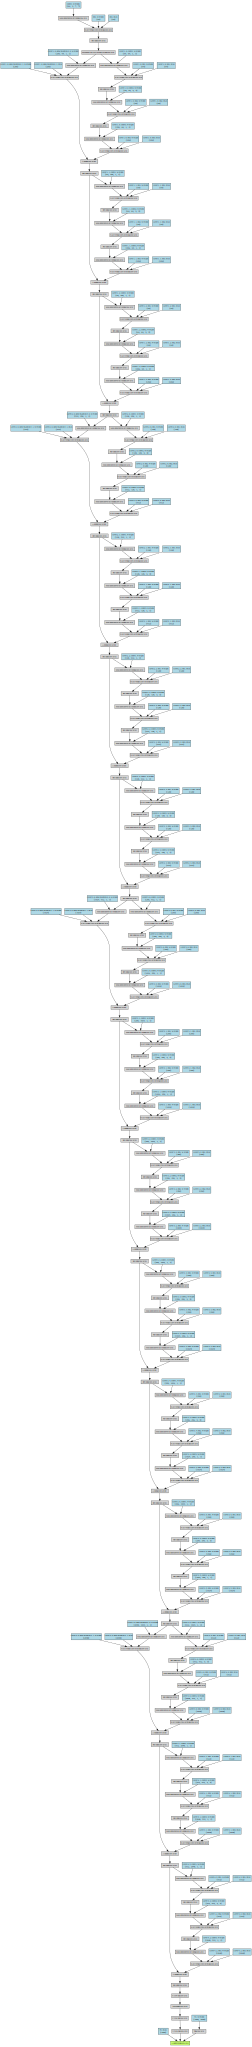

In [12]:
x = torch.randn(1,3,128,64)

make_dot(model.cpu()(x), params=dict(model.named_parameters()))

## EfficientNet w wersji b0 

In [30]:
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet
model_efficient = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [32]:
from torchsummary import summary
summary(model_efficient.cuda(),(3,128,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1           [-1, 3, 130, 66]               0
Conv2dStaticSamePadding-2           [-1, 32, 64, 32]             864
       BatchNorm2d-3           [-1, 32, 64, 32]              64
MemoryEfficientSwish-4           [-1, 32, 64, 32]               0
         ZeroPad2d-5           [-1, 32, 66, 34]               0
Conv2dStaticSamePadding-6           [-1, 32, 64, 32]             288
       BatchNorm2d-7           [-1, 32, 64, 32]              64
MemoryEfficientSwish-8           [-1, 32, 64, 32]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         I

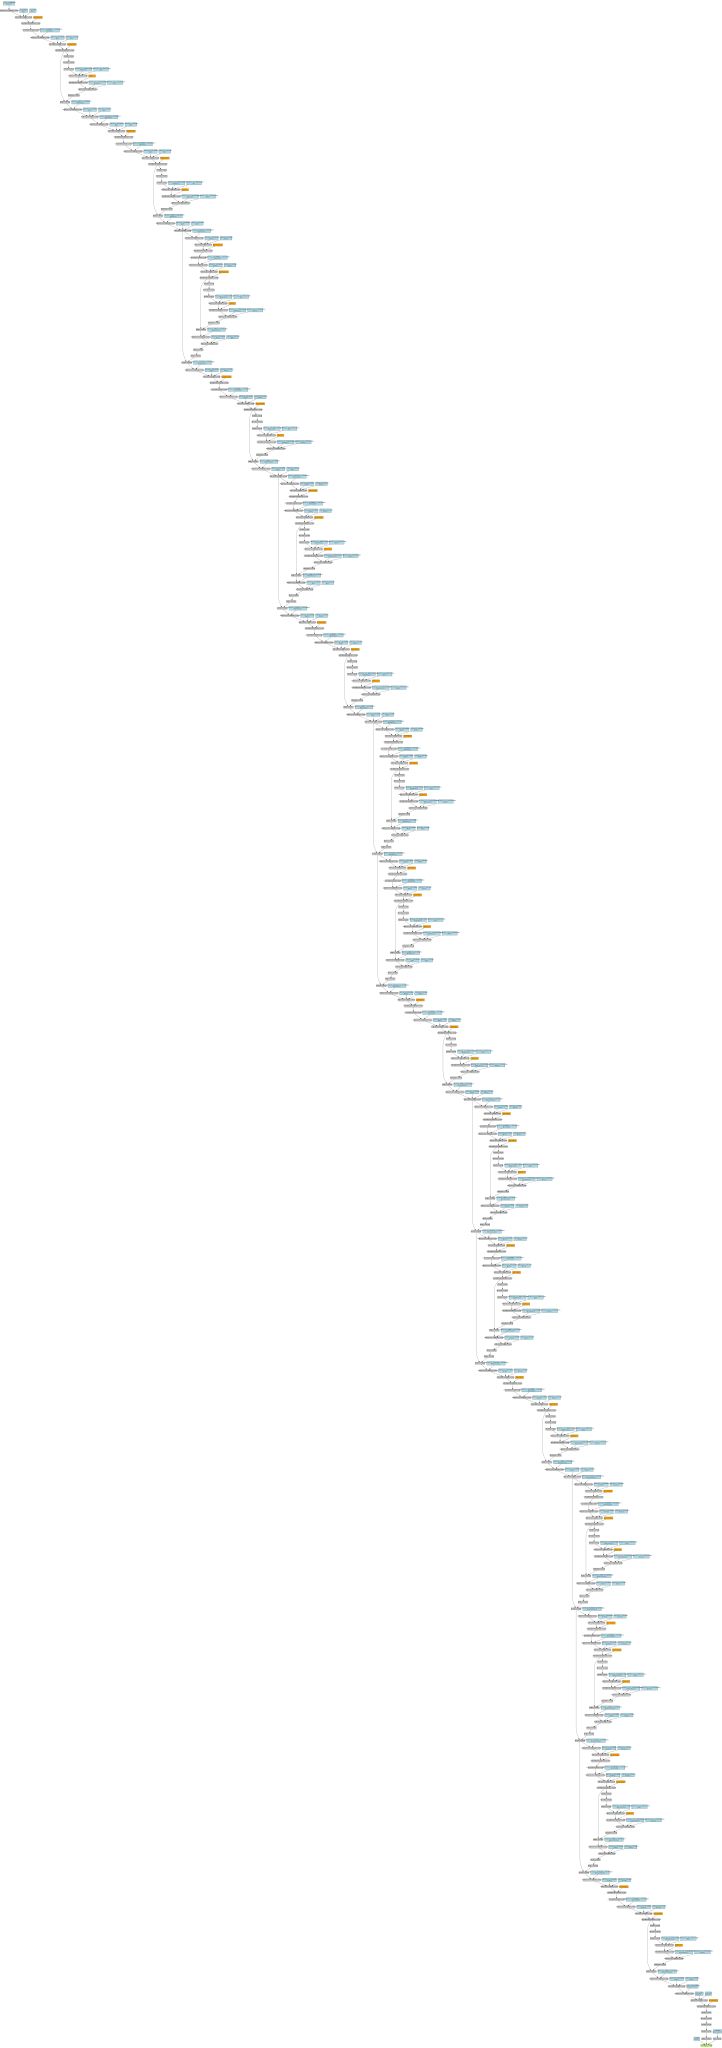

In [34]:
x = torch.randn(1,3,128,64)

make_dot(model_efficient.cpu()(x), params=dict(model_efficient.named_parameters()))

### Porównanie modeli pod względem rozmiaru i ilości parametrów

#### pomocnicze obliczenia

In [102]:
model_comparison = {
    "Resnet50":{
        "params":25557032,
        "param_size":97.49,
        },
    # "efficientnet-b0":{
    #     "params":5288548,
    #     "param_size":20.17,
    #     }
    }

In [103]:
model_comparison

{'Resnet50': {'param_size': 97.49, 'params': 25557032}}

In [104]:
import pandas as pd
df_model_comparison = pd.DataFrame.from_dict(model_comparison,orient="index")

In [83]:
efficient_dict = ['efficientnet-b0','efficientnet-b1','efficientnet-b2','efficientnet-b3','efficientnet-b4','efficientnet-b5','efficientnet-b6','efficientnet-b7']
model_efficient_dict={}
for i in efficient_dict:
  model_efficient_dict[i] = EfficientNet.from_pretrained(i)

Loaded pretrained weights for efficientnet-b0


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth



Loaded pretrained weights for efficientnet-b1


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth



Loaded pretrained weights for efficientnet-b2


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth



Loaded pretrained weights for efficientnet-b3


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth



Loaded pretrained weights for efficientnet-b4


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b5-b6417697.pth



Loaded pretrained weights for efficientnet-b5


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b6-c76e70fd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b6-c76e70fd.pth



Loaded pretrained weights for efficientnet-b6
Loaded pretrained weights for efficientnet-b7


In [92]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

25557032

In [105]:
for model_name in model_efficient_dict:
  print(item_model)
  model_item=model_efficient_dict[model_name]
  pytorch_total_params = sum(p.numel() for p in model_item.parameters())
  print(pytorch_total_params)
  model_comparison[model_name] = {"params":pytorch_total_params}

import pandas as pd
df_model_comparison = pd.DataFrame.from_dict(model_comparison,orient="index")

efficientnet-b7
5288548
efficientnet-b7
7794184
efficientnet-b7
9109994
efficientnet-b7
12233232
efficientnet-b7
19341616
efficientnet-b7
30389784
efficientnet-b7
43040704
efficientnet-b7
66347960


#### wyniki

In [106]:
df_model_comparison

,params,param_size
Resnet50,25557032,97.49
efficientnet-b0,5288548,NaN
efficientnet-b1,7794184,NaN
efficientnet-b2,9109994,NaN
efficientnet-b3,12233232,NaN
efficientnet-b4,19341616,NaN
efficientnet-b5,30389784,NaN
efficientnet-b6,43040704,NaN
efficientnet-b7,66347960,NaN


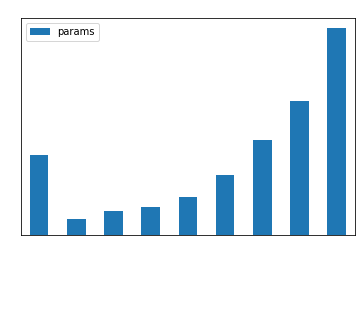

In [111]:
import matplotlib.pyplot as plt

fig=df_model_comparison.plot(y='params', kind = 'bar')
fig.tick_params( colors='white')

## 5. Rozwiązania optymalizujące proces trenowania.

Zmiany poprawiające proces uczenia zaimpementowane w [[1] reid-strong-baseline -github](https://github.com/michuanhaohao/reid-strong-baseline) zostały zaprezentowane na grafice umieszczonej poniżej.
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/reidTricks.jpg?raw=true" alt="drawing" width="400"/>
<br><br>


### 5.1 Rozgrzewanie kroku uczenia (Warmup Learning Rate)

### 5.2 Losowo wycinanie (Random Erasing Augumentation)

### 5.3 (Label Smoothing)

### 5.4 (Last Stride)

### 5.5 BBNeck

### 5.6 Center Loss

## 6. Rozwiązanie bazowe

## [7. Modyfikacje]()

### 7.1 Użycie jako sieci bazowej sieci EfficientNet

[[2]](https://github.com/lukemelas/EfficientNet-PyTorch?fbclid=IwAR28bdEvf05yCsMdE7ByUP5z-6EyRmadPp5EoyLd57nahLfsikDEuiIT7eU) to repozytorium z implementacja sieci EficientNet z użyciem biblioteki PyTorch.

Repozytorium zawiera wytrenowane model na bazie obrazów ImageNet. Posiada również zaimplementowane metody do ewaluacji wytrenowanej sieci na własnym zbiorze danych.

###  Opis sieci EfficienNet:

Zgodnie z opisem zawartym w repozytorium EfficientNet to model należący do grupy modeli dedykowanych klasyfikacji obrazów. Uzyskał on, na moment pisanie tej pracy, najlepsze wyniki w tej grupie zadań. Ponad to jest mniejszym i szybszym modelem niz jego poprzednicy. Jest wzorowany na modelach AutoML oraz  Compound Scaling.

W szczególności model EfficientNet-B0 jest modelem o rozmiarze odpowiadającym rozwiązaniom mobilnym, który czerpie z AutoML Mobile framework.

W dokumencie zaprezentowano wykresy prezentujące ilość parametrów dla kilku z wiodących rozwiązań w porównaniu do EfficientNet

<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/EfficientNetPorownanie.jpg?raw=true" alt="drawing" width="400"/>
<br><br>

Autorzy rozwiązania wymieniają osiągnięcia modelu jako: 
 - Przy wysokim poziomie dokładności wyników sieć EfficientNet-B7 osiągneło najlepszy wynik o poziomie 84.4% dla "top-1" oraz 97.1% wśród pięciu najlepszych wyników ("top-5") na zbiorze danych ImageNet z 66 milionami parametów i 37B FLOPS. Jest to model 8.4 razy mniejszy i 6.1 razy szybszy na CPU od swojego poprzednika Gpipe ([[8] GPipe - pdf](https://arxiv.org/pdf/1811.06965.pdf)).

 - Przy średnim poziomie dokładności wyników, model EfficientNet-B1 jest 7,6 razy mniejszy i 5,7 razy szybszy na CPU od ResNet-152 ([[9] Deep Residual Learning for Image Recognition - pdf](https://arxiv.org/pdf/1512.03385.pdf)) z porównywanym wynikiem dokładności dla ImageNet.

 - W porównaniu z powszechnie używanym ResNet-50 model EfficientNet-B4 porawia wyniki dla "top-1" rezultatów, czyli najbardziej prawdopodobnej klasyfikacji, o 6.3% (z poziomu 76,3% do 82.6%) dla tego samego poziomu FLOPS świadczącym o szybkości uzyskania predykcji.

Są to powody dla których zdecydowano o próbie wykorzystania tej architektury jako "BackBone", czyli ekstraktora cech w problemie reidentyfikacji osób. 

### 7.2 Wprowadzenie funkcji Swish jako funkcji aktywacji

Funkcja Swish zdefiniowano jako: 
<br><br>
$\text{Swish}(x) = x \cdot (1 - {e}^{-x})^{-1}$
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/Swish_plot.jpg?raw=true" alt="drawing" width="400"/>
<br><br>

Zgodnie z [[3] Why Swish could perform better than ReLu](https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/?fbclid=IwAR1muCJQpjU4M4dHcCx2wj3PAtYtL6rpEi5-aU9LSjrkrBONQXTqScR2AtU) taka postać funkcji aktywacji może poprawić wyniki poprzez:
 - Dla dużych wartości ujemnych, tak jak funkcja ReLu zeruje takie aktywacje.
 - Dla wartości dodatnich aktywacji funkcja Swish zachowuje się podobnie do ReLu i nie ograniczna tych wartości "od góry"
 - W okolicjach zera funkcja jest różniczkowalna i nie zawiera nielinowości
 - Małe wartości ujemne nie są zerowane co może pomóc w doszkalaniu modelu w procesie szukania subtelnych cech głębokich.

## 8. Porównanie modeli.

### 8.1 Mean Avarage Precision (mAP)

### 8.2 Czas przetwarzania obrazu.

## 10. Bibliografia
- [[1] reid-strong-baseline -github](https://github.com/michuanhaohao/reid-strong-baseline)
- [[2] Mingxing Tan, Quoc V. Le: “EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks”, 2019, International Conference on Machine Learning, 2019; <a href='http://arxiv.org/abs/1905.11946'>arXiv:1905.11946</a>](https://arxiv.org/pdf/1905.11946.pdf)
- [[3] Why Swish could perform better than ReLu](https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/?fbclid=IwAR1muCJQpjU4M4dHcCx2wj3PAtYtL6rpEi5-aU9LSjrkrBONQXTqScR2AtU)
- [[4] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch](https://arxiv.org/pdf/1910.10093.pdf)
- [[5] Torchreid: Library for Deep Learning Person Re_Identyfication in Pytoch - github project](https://github.com/KaiyangZhou/deep-person-reid/tree/master/projects)
- [[6] Hao Luo, Youzhi Gu, Xingyu Liao, Shenqi Lai, Wei Jiang: “Bag of Tricks and A Strong Baseline for Deep Person Re-identification”, 2019](https://arxiv.org/pdf/1903.07071.pdf)
- [[7] Market1501 - pdf](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Zheng_Scalable_Person_Re-Identification_ICCV_2015_paper.pdf)
- [[8] GPipe - pdf](https://arxiv.org/pdf/1811.06965.pdf)
- [[9] Deep Residual Learning for Image Recognition - pdf](https://arxiv.org/pdf/1512.03385.pdf)
- [[10] Duke MTMC dataset](https://megapixels.cc/duke_mtmc/)
- [[11] YOLO5](https://github.com/ultralytics/yolov5/)
- [[12] EfficientNet github](https://github.com/lukemelas/EfficientNet-PyTorch?fbclid=IwAR28bdEvf05yCsMdE7ByUP5z-6EyRmadPp5EoyLd57nahLfsikDEuiIT7eU)
